# import packages for loading
Numpy for arrays

matplotlib for visualizing

nibabel will be for loading neuroimage files

In [2]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import nibabel as nib # neuroimage babel

from PIL import Image
Image.MAX_IMAGE_PIXELS = None

# file locations

Andrew will have to update this on the cluster



In [2]:
image_file = '/home/dtward/bmaproot/nafs/dtward/post_mortem_mri_pathology/TrainingDataOctober2022/BRC2614_AD_Block1_PHF-1_Location_5_corrected.tif' # on daniels computer
# image_file = '/nafs/dtward/post_mortem_mri_pathology/TrainingDataOctober2022' # on cluster

annotation_file = '/home/dtward/bmaproot/nafs/dtward/post_mortem_mri_pathology/TrainingDataOctober2022/Brain2_Block1_L5_SampleZone+Biomarker.nii.gz' # on daniels computer

# image_file = '' # On Andrew's computer
# annotation_file = '' # On Andrew's computer

# load the image

In [3]:
I = plt.imread(image_file)

In [4]:
print(I.shape) # about 10000 pixels by 20000 pixels, third index is red/green/blue channels

(9464, 16379, 3)


# Draw the image with downsampling
if we don't downsample it will probably break your browser

<IPython.core.display.Javascript object>


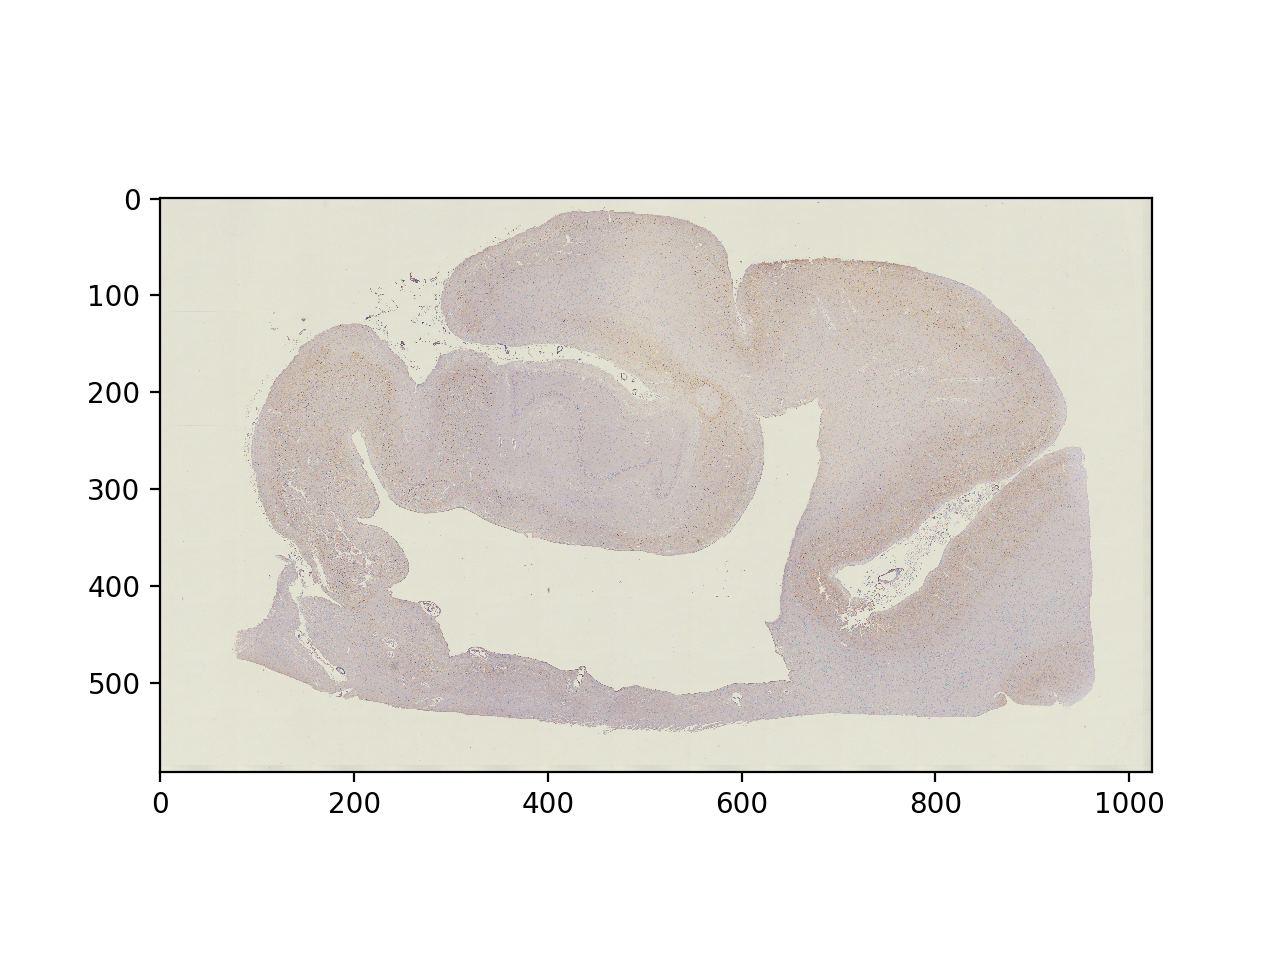

In [5]:
down = 16
fig,ax = plt.subplots()
ax.imshow(I[::down,::down]) 
# this means start at the first pixel, go to the last pixel, and stepping every 32 pixels
# this is called fancy indexing, see here https://numpy.org/doc/stable/user/basics.indexing.html

<IPython.core.display.Javascript object>


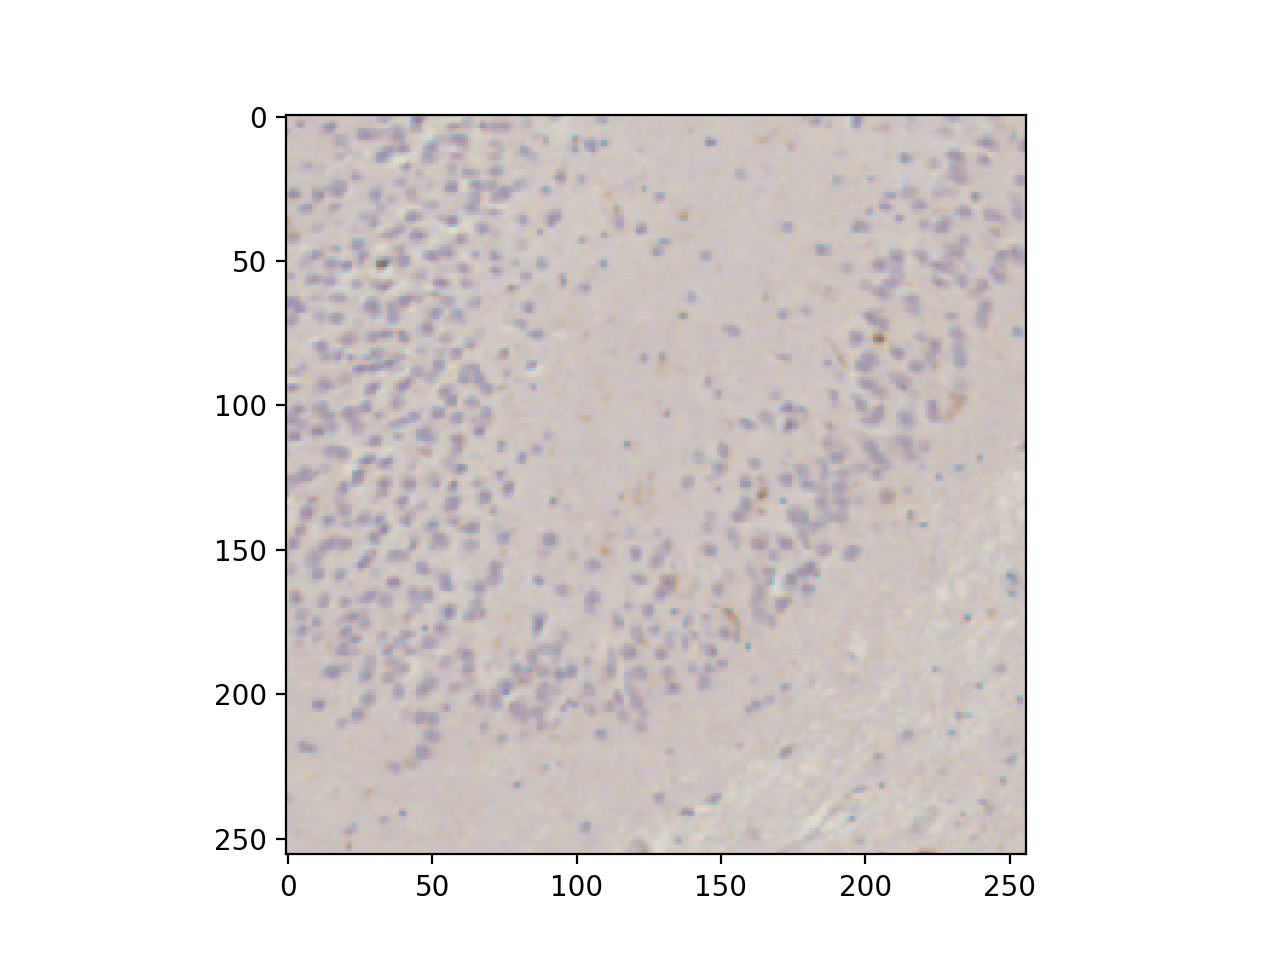

In [6]:
# zoom in on a small region
i0 = np.array(I.shape)//2
# note, // 2 means integer division (takes the floor), because
n = 256
fig,ax = plt.subplots()
ax.imshow(I[i0[0]:i0[0]+n, i0[1]:i0[1]+n])

# Load the annotations

In [7]:
vol = nib.load(annotation_file)
print(vol.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [    3 16379  9464     1     1     1     1     1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [1.         0.35277778 0.35277778 1.         0.         0.
 0.         0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : -0.0
qoffset_y       : -0.0
qo

In [8]:
# note, this is transposed because the size is 16000 x 10000 
S = np.array(vol.get_fdata())[...,0].T # pick the first channel from the last axis.  This axis only has one channel anyway

In [9]:
print(S.shape)

(9464, 16379)


# Draw it

<IPython.core.display.Javascript object>


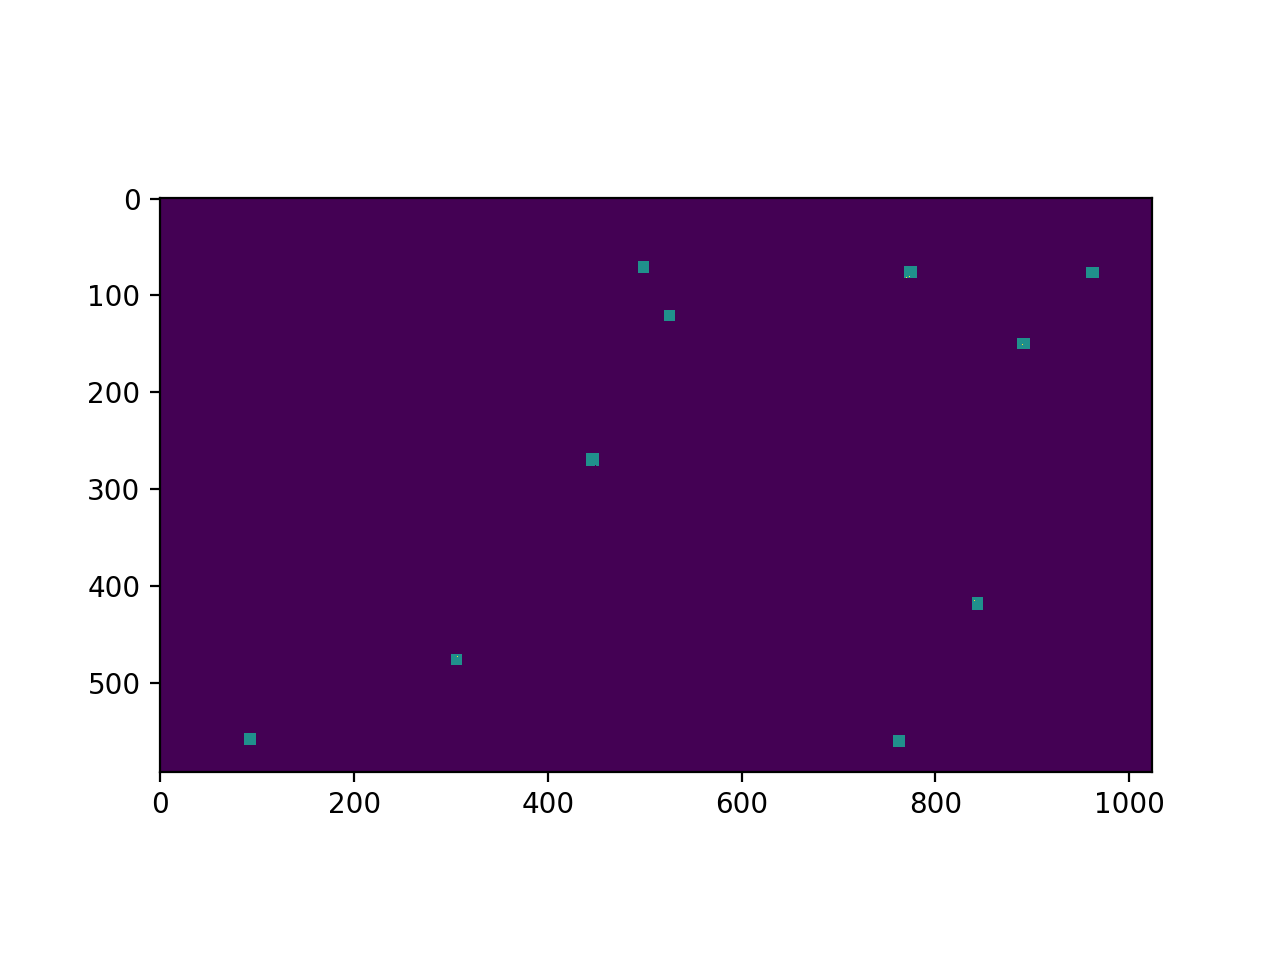

In [10]:
fig,ax = plt.subplots()
ax.imshow(S[::down,::down]) 
# this means start at the first pixel, go to the last pixel, and stepping every 32 pixels
# this is called fancy indexing, see here https://numpy.org/doc/stable/user/basics.indexing.html

<IPython.core.display.Javascript object>


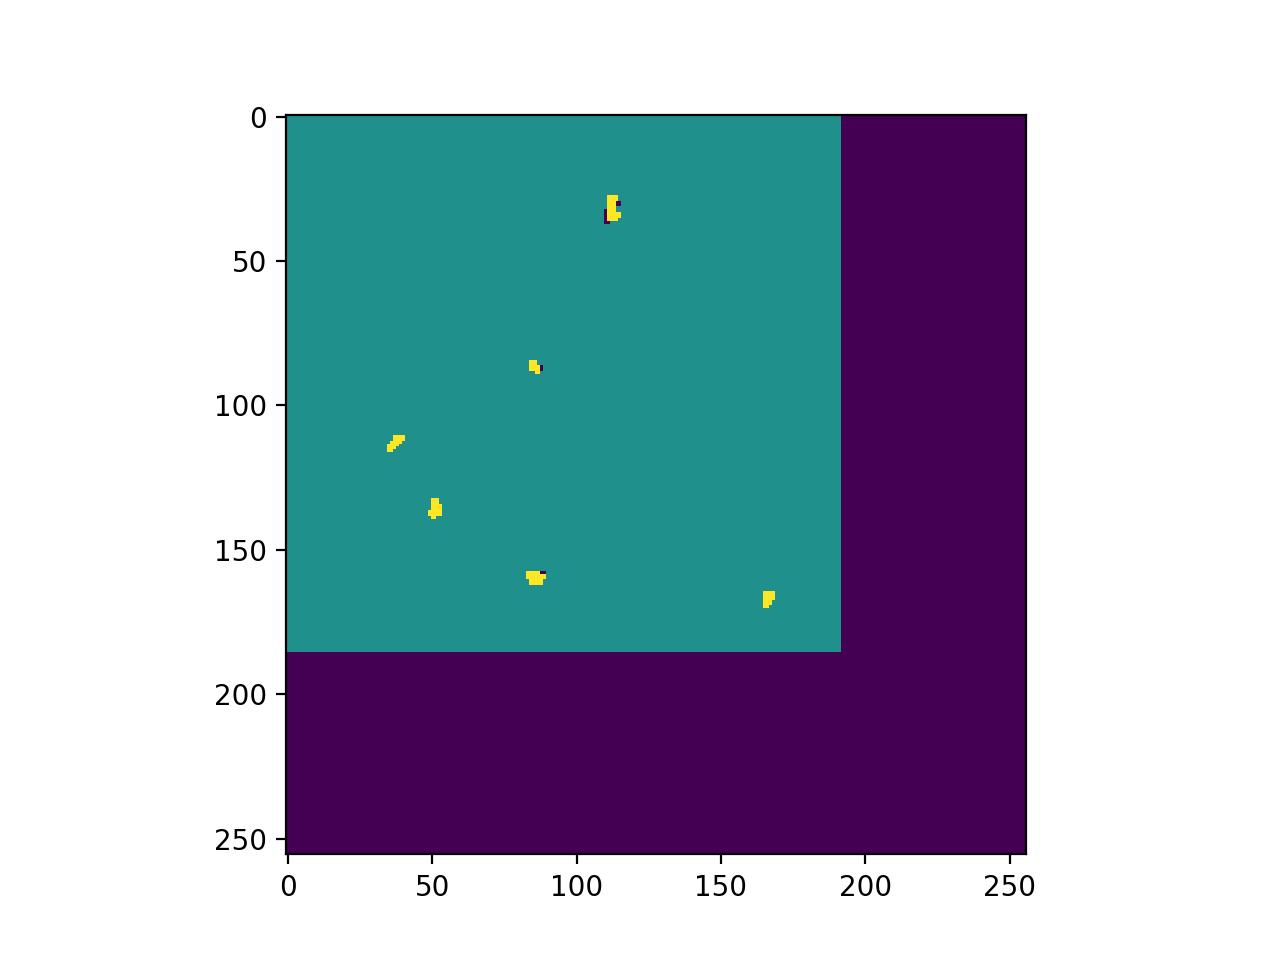

In [11]:
i0 = np.array([470,300])*down
fig,ax = plt.subplots()
ax.imshow(S[i0[0]:i0[0]+n, i0[1]:i0[1]+n])

<IPython.core.display.Javascript object>


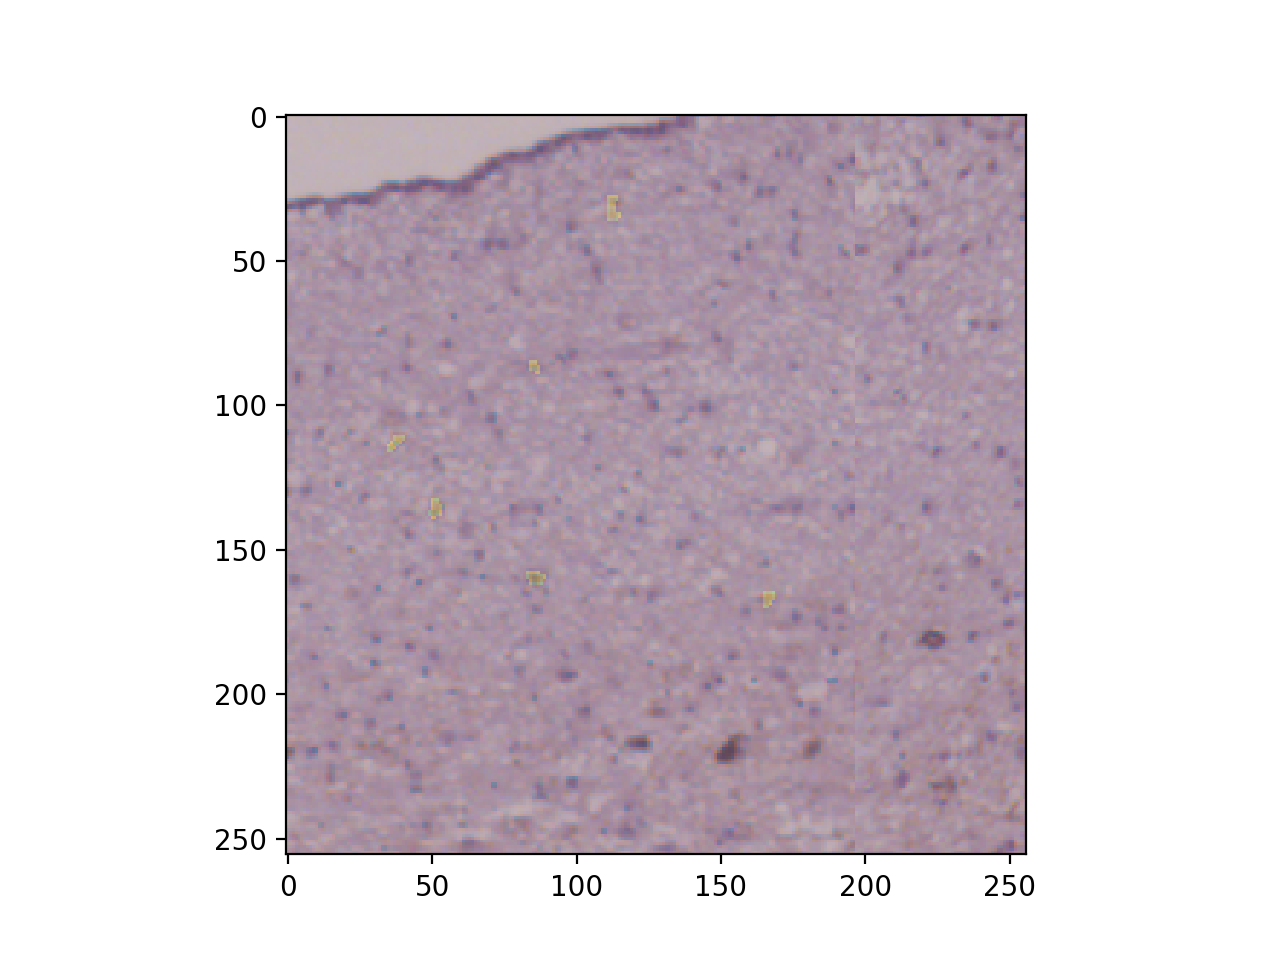

In [16]:
fig,ax = plt.subplots()
ax.imshow(I[i0[0]:i0[0]+n, i0[1]:i0[1]+n])
ax.imshow(S[i0[0]:i0[0]+n, i0[1]:i0[1]+n]>1,alpha=0.2)

# Andrew's data loader class

Write a data loader within pytorch using the below specifications (modified from Slack message):

What features does the data loader need to have:
- ~~Load a file ONE time~~
- ~~Look into a segmentation image~~
- ~~Find all the regions that have been annotated.~~
- ~~Extract a square of a fixed size from one of those regions and return it.~~
- ~~Return the same region from the corresponding tif file.~~
- Save them as a bunch of smaller files to some other location.
- When you want to load a sample, check if you’ve already saved a dataset in the appropriate location.

Challenges:
- Some of the images were split into 4 for labeling.
- You may have to glue them together.

Let’s take a look at pseudocode.
- ~~Note sample zones are 200x200, so little l is 200.~~

Input to data loader:
- First arg: list of pairs: (tif file, (list of segmentation files))
- Second arg: a directory where you are storing the smaller extracted dataset.

Output from data loader:
- A pair (numpy array with image data, numpy array storing the label data).
- The second time you access an image, we should be able to load the small dataset.

In [ ]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import nibabel as nib # neuroimage babel

from PIL import Image
Image.MAX_IMAGE_PIXELS = None

In [ ]:
## Pseduocode
# 
# l = length of block
# newDataset = empty data structure
# for image in imageDataset:
#  for r,c in image:
#    if i[r][c] > 0 and i[r-1][c] == 0 and i[r][c-1] == 0:
#      croppedImage = image[r:r+l][c:c+l]
#      newDataset += croppedImage

In [4]:
# Load original image and display shape
image_file = '/nafs/dtward/post_mortem_mri_pathology/TrainingDataOctober2022/BRC2614_AD_Block1_PHF-1_Location_5_corrected.tif' # on daniels computer
I = plt.imread(image_file)
print(I.shape)

# Load annotations and display shape
annotation_file = '/nafs/dtward/post_mortem_mri_pathology/TrainingDataOctober2022/Brain2_Block1_L5_SampleZone+Biomarker.nii.gz' # on daniels computer
vol = nib.load(annotation_file)
S = np.array(vol.get_fdata())[...,0].T
print(S.shape)

(9464, 16379, 3)
(9464, 16379)


In [48]:
def newChunk(r,c,l,ec):
    for coord in ec:
        # Checks if (r,c) is in an existing chunk with upper left corner coord
        if r > coord[0] and r < (coord[0]+l) and c > coord[1] and c < (coord[1]+l): 
            return False
    return True

In [88]:
newImageSet = []
newAnnotationSet = []
existingChunk = []
l = 200 # Predefined length of annotations

for r in np.arange(0,S.shape[0]):
    for c in np.arange(0,S.shape[1]):
        # Check if pixel is an "upper left corner" and check that it is not in an existing chunk
        if S[r][c] > 0 and S[r-1][c] == 0 and S[r][c-1] == 0 and newChunk(r,c,l,existingChunk):
            newImageSet.append(I[r:r+l,c:c+l])
            newAnnotationSet.append(S[r:r+l,c:c+l])
            existingChunk.append([r,c])
            print(f"Appended chunk at ({r/16},{c/16})")
    if r % 1000 == 0: # To keep track of progress while the outer for loop is running
        print(f"Finished row {r}")

Finished row 0
Finished row 1000
Appended chunk at (64.0625,492.0625)
Appended chunk at (69.5625,767.8125)
Appended chunk at (70.125,955.625)
Appended chunk at (114.4375,519.0625)
Finished row 2000
Appended chunk at (143.1875,884.625)
Finished row 3000
Finished row 4000
Appended chunk at (262.8125,439.9375)
Finished row 5000
Finished row 6000
Appended chunk at (411.6875,837.375)
Finished row 7000
Appended chunk at (469.125,299.5)
Finished row 8000
Appended chunk at (551.4375,86.375)
Appended chunk at (553.0625,756.0625)
Finished row 9000


# Display the 10 extracted annotations

<IPython.core.display.Javascript object>


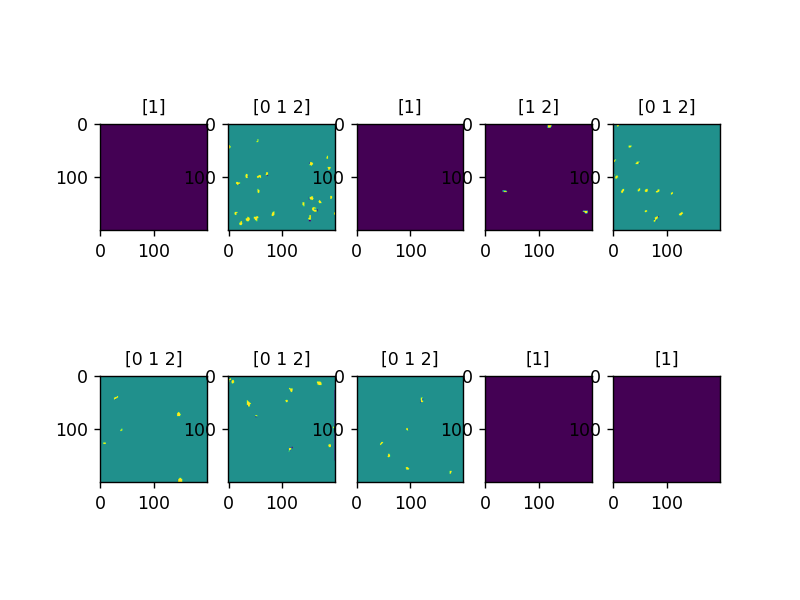

In [87]:
from matplotlib import colors

fig,axs = plt.subplots(2,5)
count = 0

for i in np.arange(0,2):
    for j in np.arange(0,5):
        axs[i,j].imshow(newAnnotationSet[count],cmap='viridis')
        axs[i,j].set_title((np.unique(newAnnotationSet[count])).astype(int),fontsize=10)
        count+=1